In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [2]:
# Create dataframes
df = pd.read_csv('airline.csv')
df.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer                           129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type_of_Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi                      129880 non-null  int64  
 7   Departure/Arrival_time_convenient  129880 non-null  int64  
 8   Ease_of_Online booking             129880 non-null  int64  
 9   Gate_location                      129880 non-null  int64  
 10  Food_and_drink                     129880 non-null  int64  
 11  Online boarding                    1298

In [4]:
#Checking the missing values in the dataset
df.isnull().sum()

Gender                                 0
Customer                               0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi                          0
Departure/Arrival_time_convenient      0
Ease_of_Online booking                 0
Gate_location                          0
Food_and_drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             393
satisfaction                           0
dtype: int64

In [5]:
#Transpose and obtain descriptive statistics of dataset
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
Flight Distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
Inflight wifi,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
Departure/Arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
Ease_of_Online booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
Gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
Food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
Online boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
Seat comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
Inflight entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


<function matplotlib.pyplot.tight_layout>

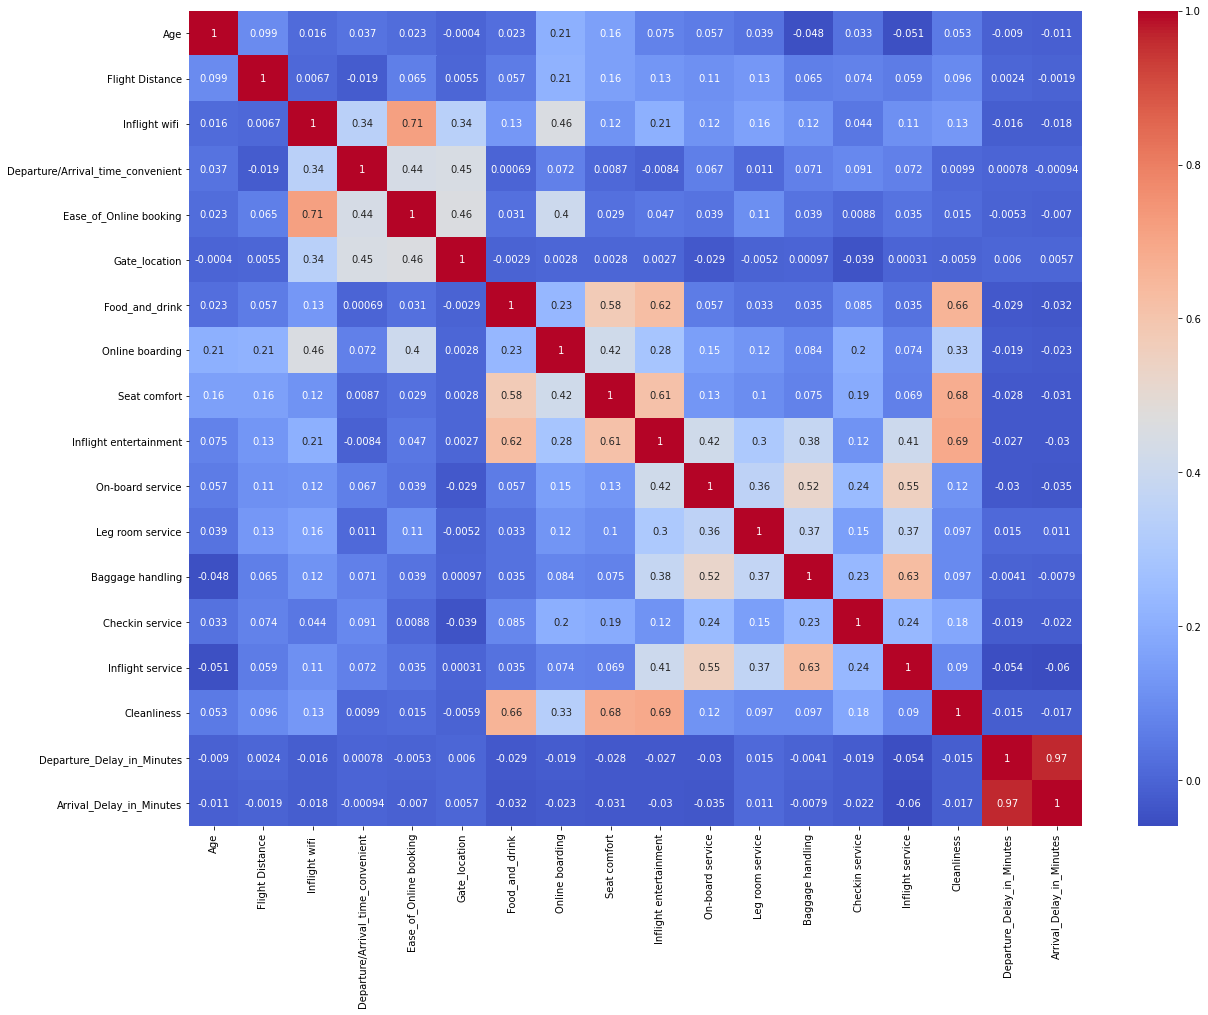

In [6]:
#heatmap of correlation with numerical variables
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

In [7]:
#Create a function to convert satifaction from categorical variable to numerical
def satisfac(string):
    if string == 'satisfied': return 1
    else: return 0

df['satisfactionN'] =df['satisfaction'].apply(satisfac) 

In [8]:
df.head()

,Gender,Customer,Age,Type_of_Travel,Class,Flight Distance,Inflight wifi,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction,satisfactionN
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied,0
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied,0
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0,satisfied,1
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied,0
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0,satisfied,1


In [9]:
#Drop the satisfaction categorical column and keep the newly created satisfactioN numerical column
df.drop('satisfaction',inplace=True,axis=1)

<function matplotlib.pyplot.tight_layout>

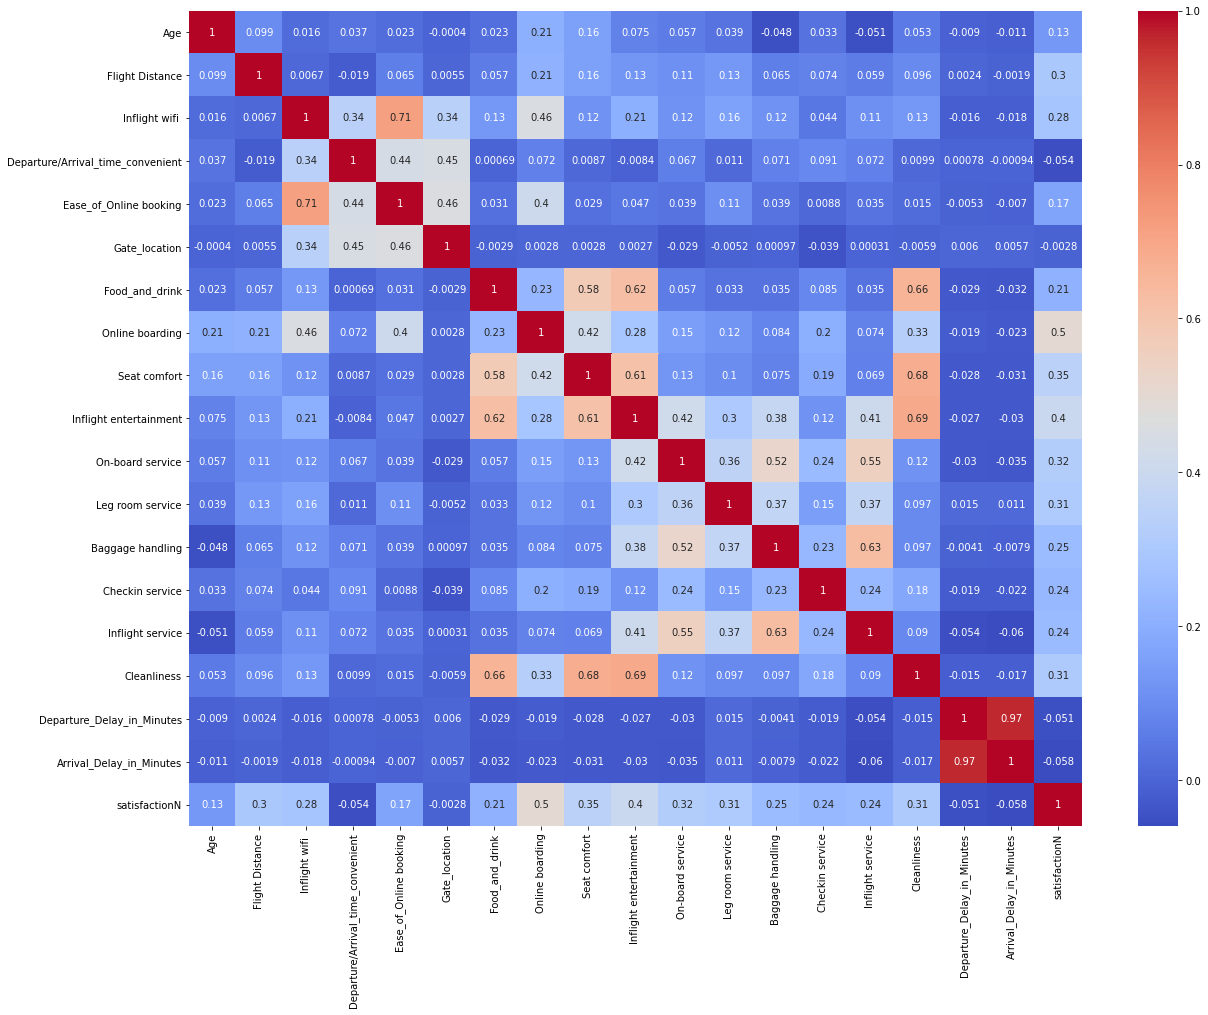

In [10]:
#heatmap of correlation with numerical variables including satisfactioN
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.tight_layout

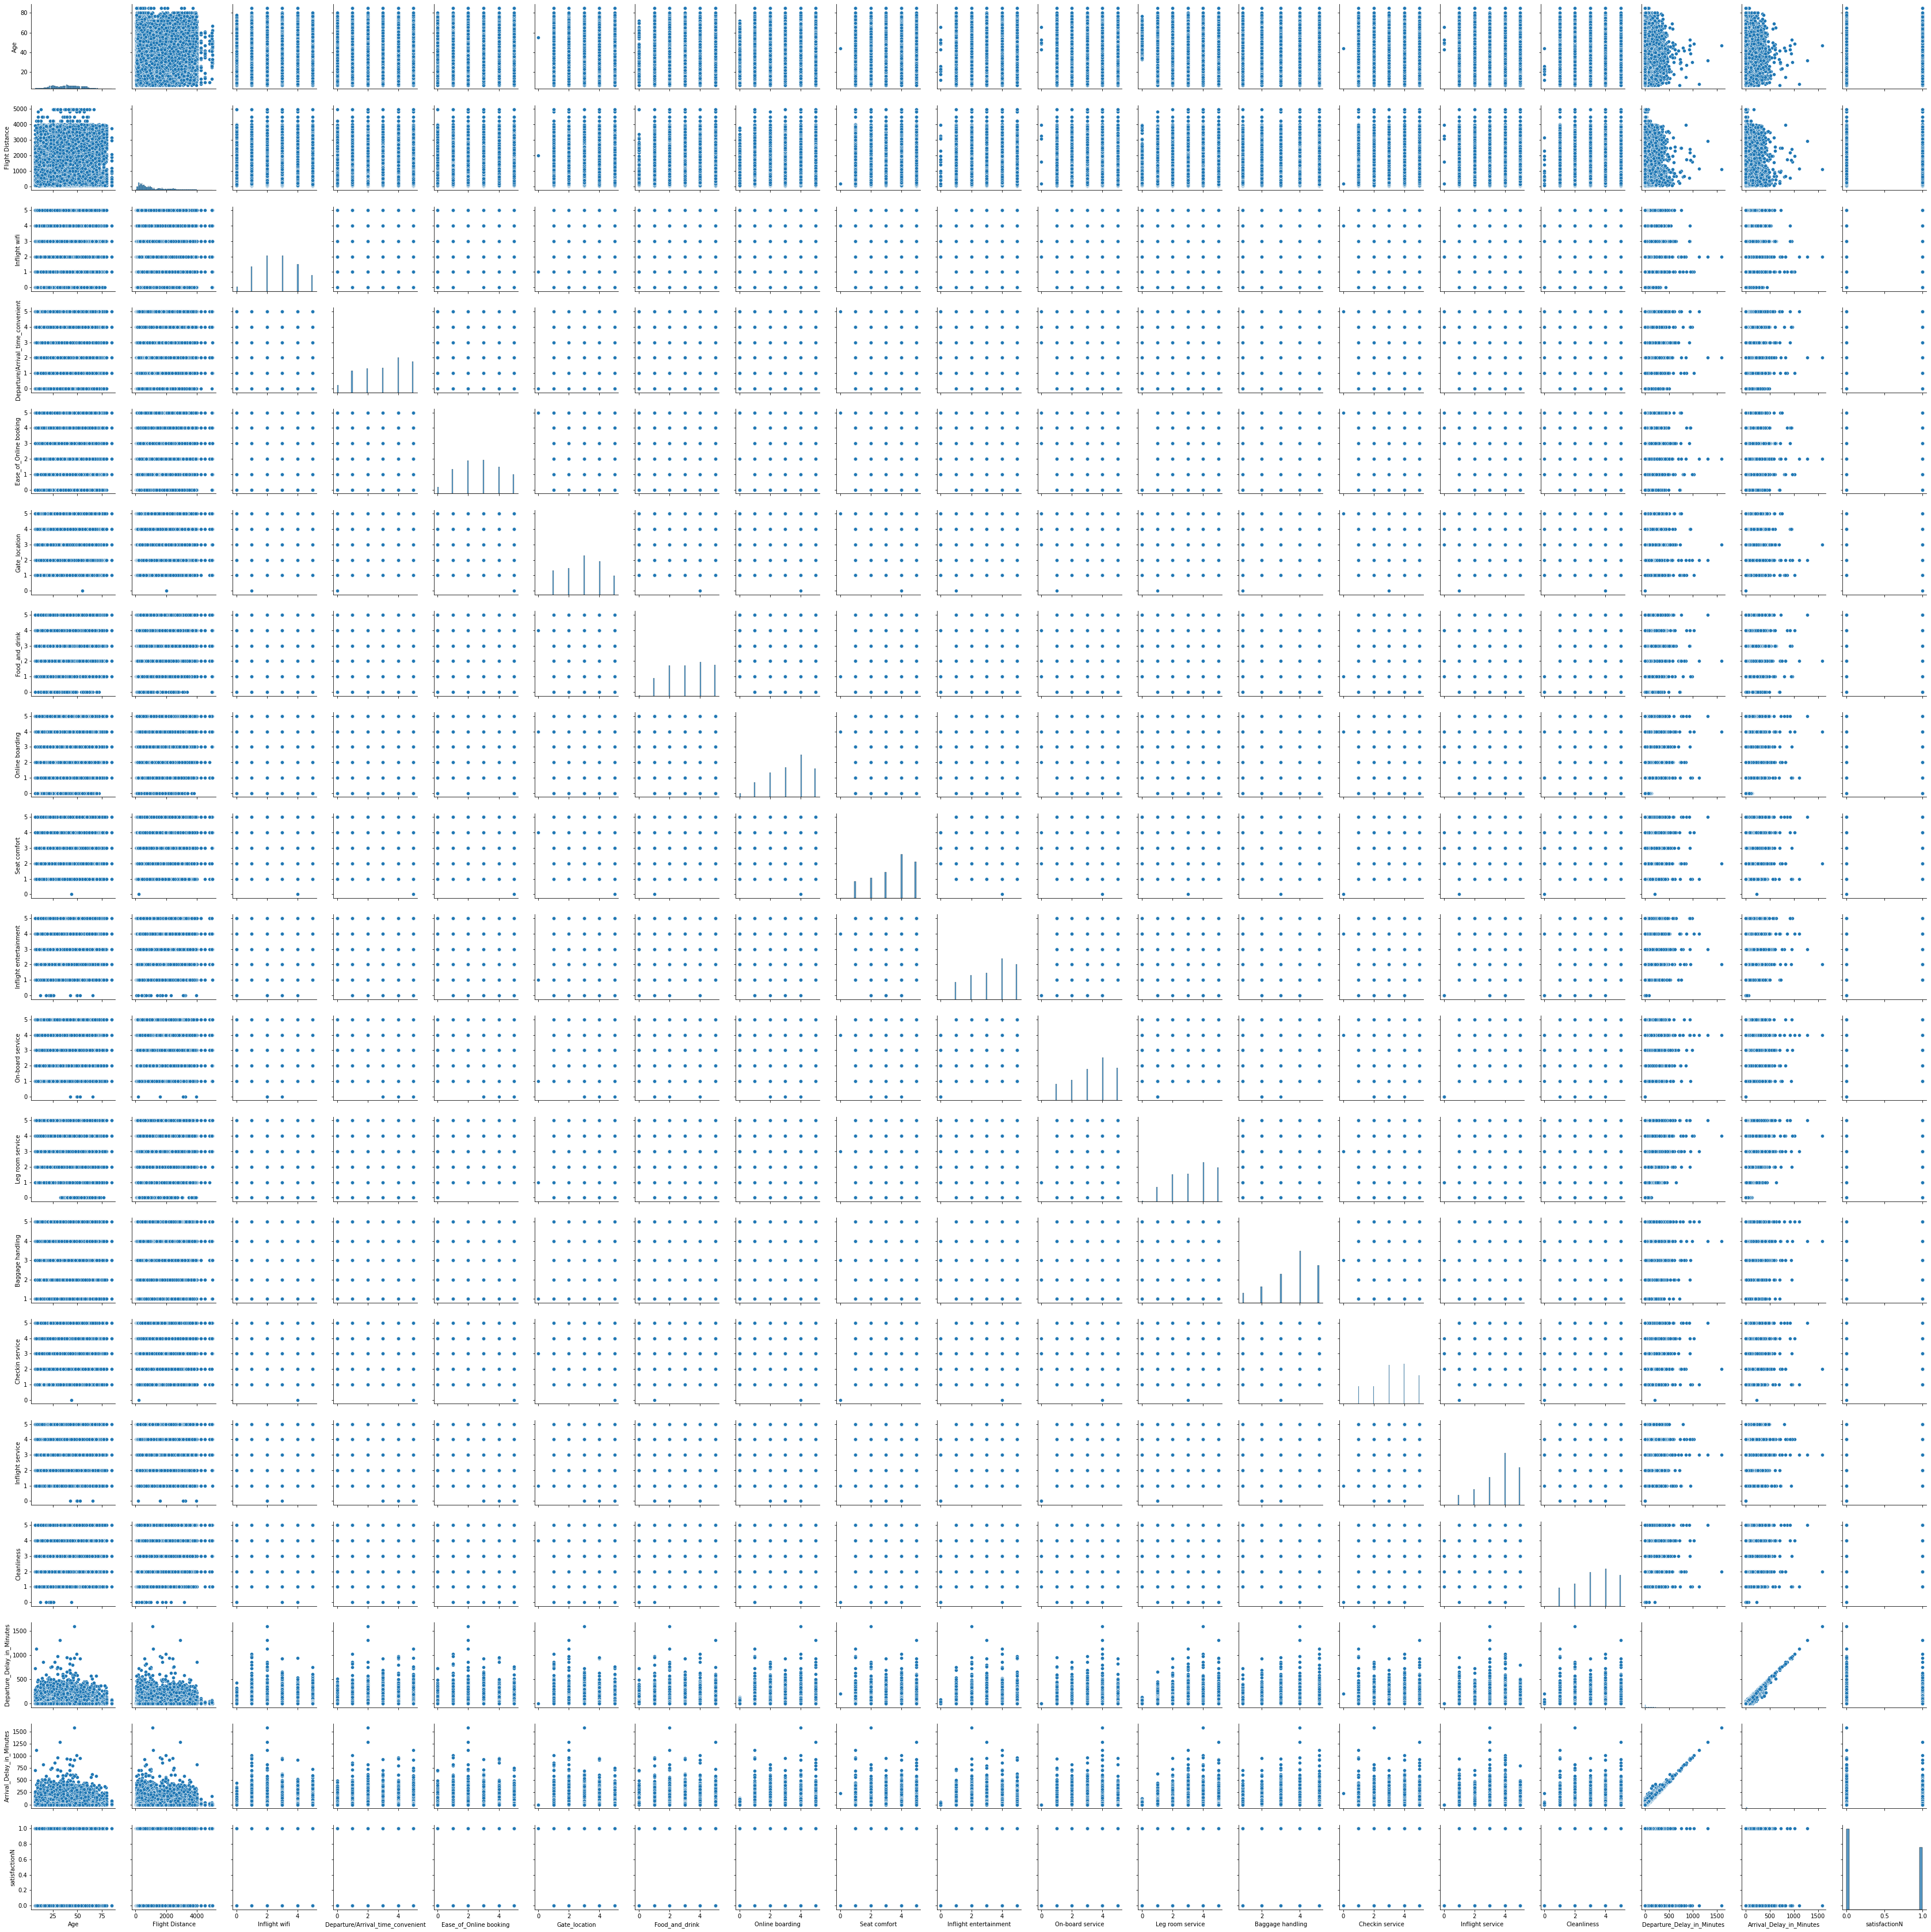

In [11]:
#plot pairwise plot of all numerical variable distributions
sns.pairplot(df)

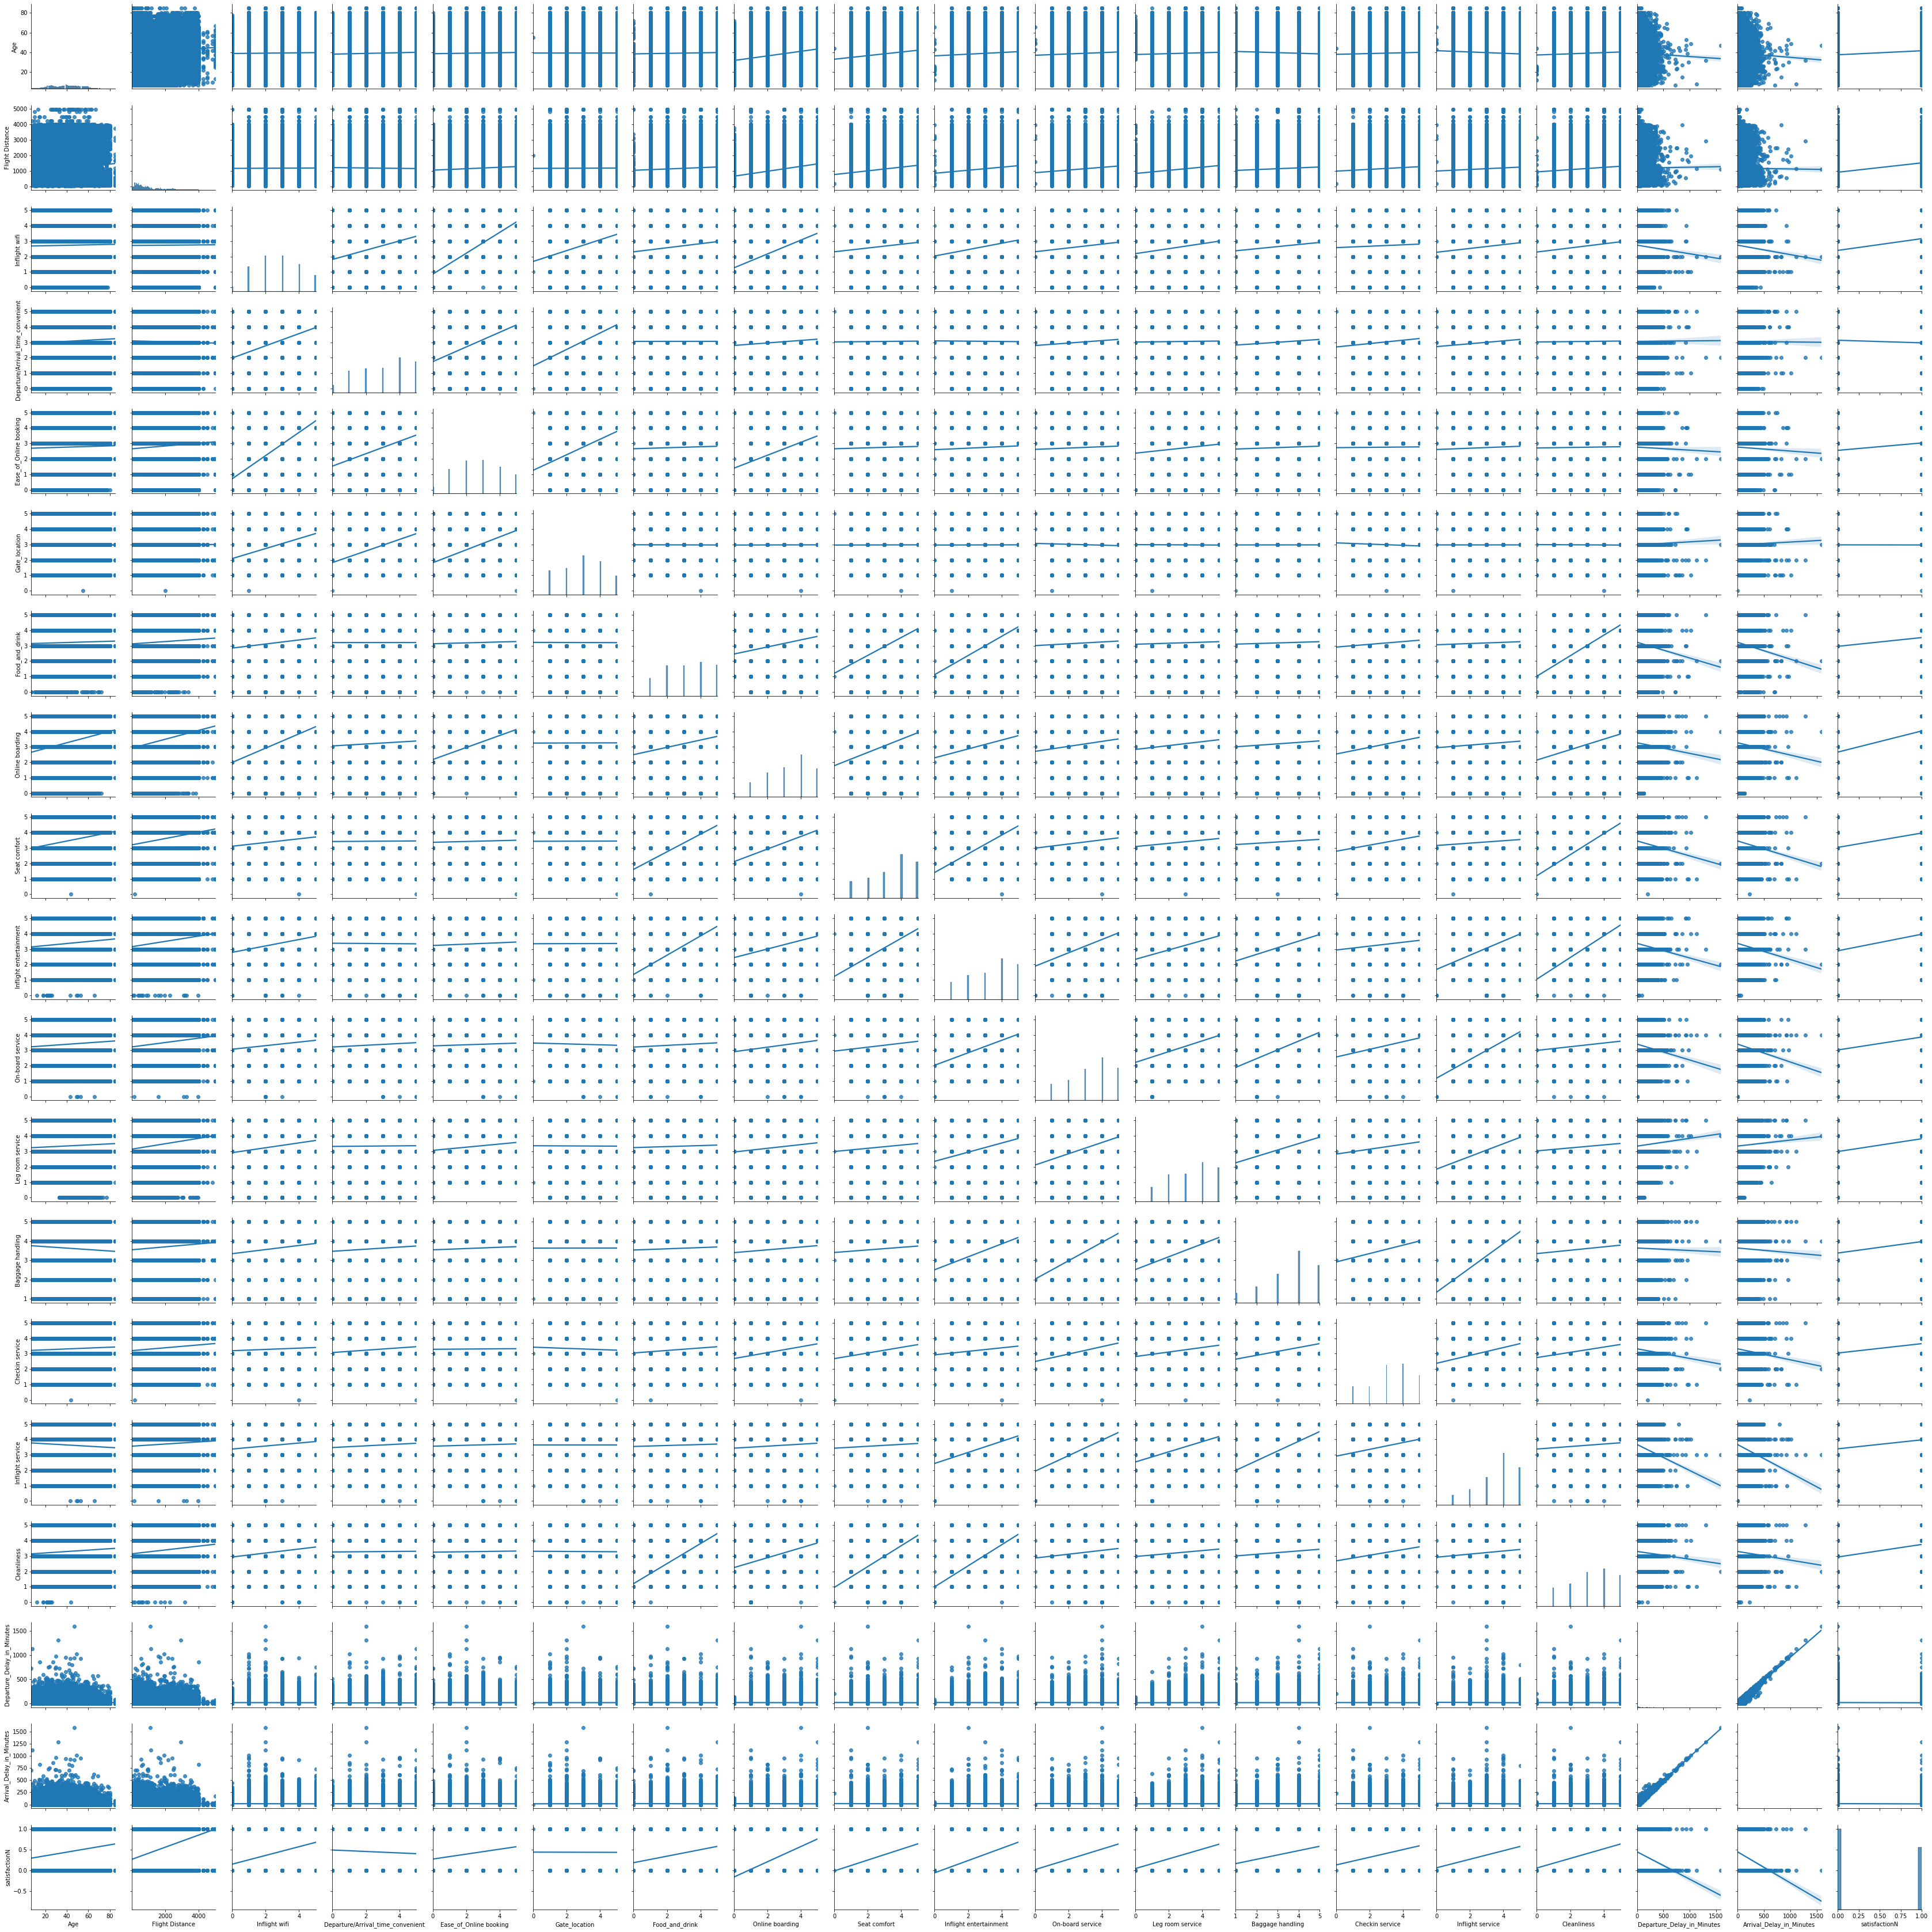

In [12]:
#plot pairwise plot with regression of all numerical variable ditributions 
sns.pairplot(df, kind="reg")

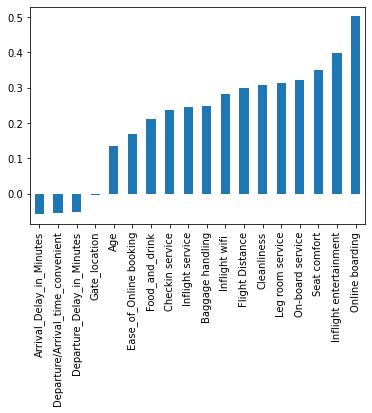

In [13]:
#Rank features from positive to negative correlation with outcome variable of satisfactioN
df.corr()['satisfactionN'].sort_values().drop('satisfactionN').plot(kind='bar')